# ワインの品質を判定してみよう


## ワインデータを読み込んでみよう

In [10]:
import pandas as pd
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


# Random Forest

ランダムフォレストは機械学習モデルの一つです。<br>
クラス分類、回帰、クラスタリングなどに利用する事ができます。<br>
複数の決定木を使って各決定木の予測結果の多数決で結果を求める方法です。<br>


決定木とは、分類（や回帰）のルールをツリーで表現したものです
![](./data/random_forest.png)

[決定木 wikipediaより]

# 今回の評価指標

## F値
##### <font color="#ff0000">予測結果の評価尺度の一つ。</font>

正と負の2クラスの分類問題を考える． 分類器の予測結果と，真の結果に基づいて以下のように分類． 例えば，真に正であるデータで，かつ，予測結果も正であったようなデータ数をTP個とする．

![](./data/image-5.png)

![](./data/image-2.png)


## recall 
####  <font color="#ff0000">Recall（再現率)</font>

再現率 (recall, 感度, sensitivity)：実際に正であるもののうち，正であると予測されたものの割合

![](./data/image-6.png)


## Precision（適合率）
####  <font color="#ff0000">Precision（適合率）</font>

適合率 (precision)：正と予測したデータのうち，実際に正であるものの割合

![](./data/image-7.png)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y = wine["quality"]
x = wine.drop("quality", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解=", accuracy_score(y_test, y_pred))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.44      0.32      0.37        34
           5       0.64      0.73      0.68       269
           6       0.70      0.73      0.72       474
           7       0.66      0.52      0.59       174
           8       0.76      0.57      0.65        23

   micro avg       0.67      0.67      0.67       980
   macro avg       0.54      0.48      0.50       980
weighted avg       0.67      0.67      0.67       980

正解= 0.6724489795918367


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


これは、ワインの品質分類の精度を表す値です。実行するたびに値は異なりますが、大体0.61~0.67までの数値が表示されます。
約67%程度の正解率では、あまり精度が高いとは言えません。そこで、もう少し今回のワインデータの精度向上を目指してみます

## 精度向上を目指そう
今回のデータについて実行結果に<font color="red">UndefinedMetricWarning</font>という警告が表示されています。これは、すべてのラベルにデータが分類されていないことを表しています。
ですから、今回のデータについて改めて確認してみましょう。<br>
このワインのデータは、ワインの品質を０から１０までの１１段階に分類するというものでした。<br>
しかし、データを見てみるとい１１段階のワインがそれぞれ同数あるというわけではなさそうです。<br>
それでは各品質のデータがいくずつあるのか調べてみましょう

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


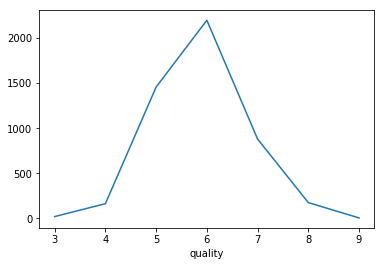

In [14]:
import matplotlib.pyplot as plt

count_data = wine.groupby('quality')["quality"].count()
print(count_data)

count_data.plot()
plt.show()

このワインデータの品質の大半は5-7でありその他のデータはわずかであることがわかります。また、２以下と10以上は存在していないことがわかりた<br>
このように、データの分布数宇の差があるデータを「<font color="red">不均衡データ</font>」と呼びます。<br>
そこで、11段階のデータを4以下、5-7、8以上としてみましょう

## ラベルを付けなおす

In [16]:
newlist = []
for v in list(y):
    if  v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

## 学習をも一度する

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解=", accuracy_score(y_test, y_pred))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.58      0.18      0.27        39
           1       0.95      0.99      0.97       917
           2       0.50      0.21      0.29        24

   micro avg       0.94      0.94      0.94       980
   macro avg       0.68      0.46      0.51       980
weighted avg       0.92      0.94      0.92       980

正解= 0.9377551020408164


正解率を大幅に向上することができました。

今回のワイン分類では、データの分布グラフを確認しつつ、ラベルを3段階につけなおしてみました。<br>
ラベルに名前を付けるとしたら、「0:品質の悪いワイン」、「1:普通のワイン」、「2:極上のワイン」と考えることができるでしょう。<br>
もちろん、どのような目的で、機械学習のシステムを構築するのかにもよりますが、元のデータにちょっと手を加えるだけで精度を大幅に向上させることができます